Accuracy: 0.95
Confusion Matrix:
 [[36  2]
 [ 1 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.91      0.95      0.93        22

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Coefficients: [[0.40642916 2.83949469 0.54648283]]
Intercept: [-9.23735947]
     experience  win_ratio education_level  probability_predicted_win  probability_predicted_binary_format
0    16         0.724892     JD            0.427116                    0                                  
1     0         0.488699     JD            0.000571                    0                                  
2    11         0.593151     JD            0.062982                    0                                  
3    13         0.367916    LLM            0.079836                    0                    

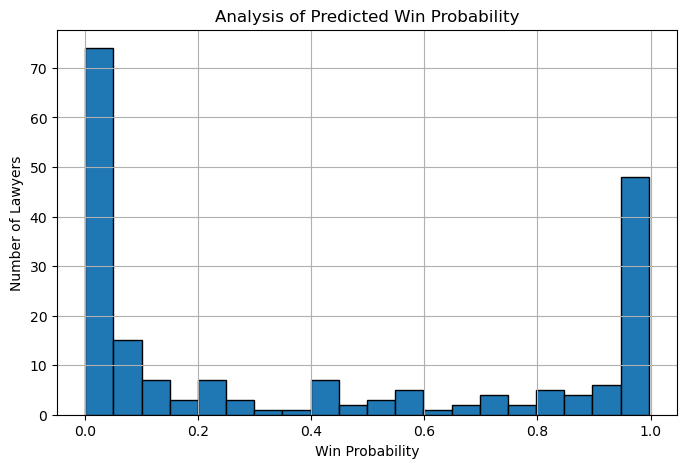

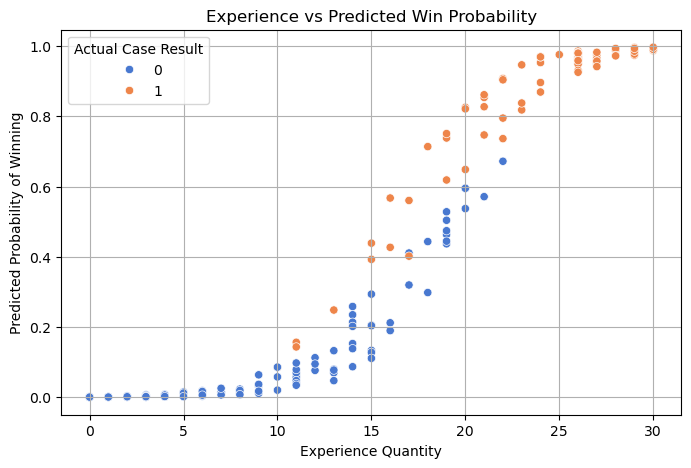

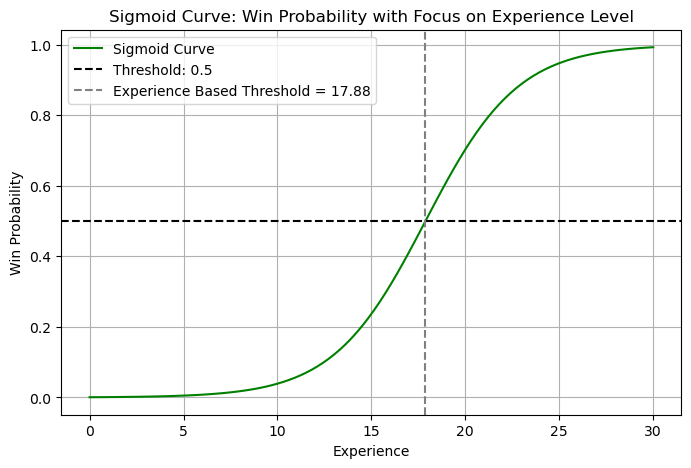

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

np.random.seed(50)

n = 200 #this will represent the randomized factors for attorney's I'll randomize below

data = {

'experience': np.random.randint(0, 31, size=n),
'win_ratio' : np.random.uniform(0.2, 0.9, size=n), #ratio strictly between 0.2-0.9
'education_level': np.random.choice(['JSD', 'LLM', 'JD'], size=n, p=[0.1, 0.3, 0.6])
}

df = pd.DataFrame(data)
df['education_factored'] = np.array([1.0 if ed == 'JSD' else 0.85 if ed == 'LLM' else 0.7 for ed in df['education_level']])
df['experience_factored'] = df['experience'] / 30
score = 0.5 * df['experience_factored'] + 0.3 * df['win_ratio'] + 0.2 * df['education_factored']
df['case_result'] = np.where(score > 0.6, 1, 0)

X = df[['experience','win_ratio','education_factored']]
y = df['case_result']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
df['probability_predicted_win'] = model.predict_proba(X)[:, 1]
df['probability_predicted_binary_format'] = model.predict(X)

experience_coefficient, win_ratio_coefficient, education_coefficient = model.coef_[0]
intercept = model.intercept_[0]
mean_win_ratio = df['win_ratio'].mean()
mean_education = df['education_factored'].mean()
experience_range = np.linspace(0,30,100)
log = (experience_coefficient * experience_range + win_ratio_coefficient * mean_win_ratio + education_coefficient * mean_education + intercept) 
probability = 1 / (1 + np.exp(-log))
threshold = (-(win_ratio_coefficient * mean_win_ratio+education_coefficient*mean_education+intercept))/experience_coefficient

pd.set_option('display.max_rows', None)        # rows
pd.set_option('display.max_columns', None)     # columns
pd.set_option('display.width', None)           #  line width
pd.set_option('display.colheader_justify', 'left')  # align headers
pd.set_option('display.float_format', '{:.6f}'.format)  # format floats
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(df[['experience', 'win_ratio', 'education_level', 'probability_predicted_win', 'probability_predicted_binary_format']])
print("threshold", threshold)
#histogram to show number of lawyers and their probability of winning
plt.figure(figsize=(8, 5))
plt.hist(df['probability_predicted_win'], bins=20, edgecolor='black')
plt.title('Analysis of Predicted Win Probability')
plt.xlabel('Win Probability')
plt.ylabel('Number of Lawyers')
plt.grid(True)
plt.show()
#scatter plot to relate experience to win probability
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='experience', y='probability_predicted_win', hue='case_result', palette='muted')
plt.title('Experience vs Predicted Win Probability')
plt.xlabel('Experience Quantity')
plt.ylabel('Predicted Probability of Winning')
plt.legend(title='Actual Case Result')
plt.grid(True)
plt.show()
# sigmoid curve 
plt.figure(figsize=(8, 5))
plt.plot(experience_range, probability, color='green', label='Sigmoid Curve')
plt.axhline(0.5, linestyle='--', color='black', label='Threshold: 0.5')
plt.axvline(threshold, linestyle = '--', color = 'grey', label = f'Experience Based Threshold = {threshold:.2f}')
plt.title('Sigmoid Curve: Win Probability with Focus on Experience Level')
plt.xlabel('Experience')
plt.ylabel('Win Probability')
plt.grid(True)
plt.legend()
plt.show()

